# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = "imperial"

cld = []
cty = []
dte = []
hum = []
log = []
lat = []
mxs = []
win = []
city_name = []
num = 0
set_data = 1

print(f"Beginning Data Retrieval")

for city in cities:
    query_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()

    try:
        num += 1
        print(f"Processing Record {num} of Set {set_data} | {city}")
        city_name.append(response["name"])
        cld.append(response["clouds"]["all"])
        cty.append(response["sys"]["country"])
        dte.append(response["dt"])
        hum.append(response["main"]["humidity"])
        log.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        mxs.append(response["main"]["temp_max"])
        win.append(response["wind"]["speed"]) 
 
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        pass
    if num == 50: 
        set_data += 1
        num = 0
print(f"------------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------------")

Beginning Data Retrieval
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | atambua
Processing Record 3 of Set 1 | srivardhan
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | saleaula
City not found. Skipping...
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | cap malheureux
Processing Record 8 of Set 1 | kurilsk
Processing Record 9 of Set 1 | mikhaylovka
Processing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 1 | tahe
Processing Record 12 of Set 1 | bangassou
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | almazar
Processing Record 16 of Set 1 | the valley
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | aksarka
Processing Record 20 of Set 1 | ranong
Processing Record 21 of Set 1 | karaman
Processing Record 22 of Set 1 | torbay
Processing Record 

Processing Record 41 of Set 4 | rocha
Processing Record 42 of Set 4 | bluefield
Processing Record 43 of Set 4 | boddam
Processing Record 44 of Set 4 | karratha
Processing Record 45 of Set 4 | kastamonu
Processing Record 46 of Set 4 | galiwinku
City not found. Skipping...
Processing Record 47 of Set 4 | cao bang
Processing Record 48 of Set 4 | moindou
Processing Record 49 of Set 4 | east london
Processing Record 50 of Set 4 | touros
Processing Record 1 of Set 5 | taunggyi
Processing Record 2 of Set 5 | kupang
Processing Record 3 of Set 5 | iralaya
Processing Record 4 of Set 5 | lolua
City not found. Skipping...
Processing Record 5 of Set 5 | svetlaya
Processing Record 6 of Set 5 | villarrobledo
Processing Record 7 of Set 5 | provideniya
Processing Record 8 of Set 5 | mancora
Processing Record 9 of Set 5 | jiaojiang
Processing Record 10 of Set 5 | samarai
Processing Record 11 of Set 5 | constitucion
Processing Record 12 of Set 5 | upington
Processing Record 13 of Set 5 | bredasdorp
Proce

Processing Record 29 of Set 8 | nome
Processing Record 30 of Set 8 | warri
Processing Record 31 of Set 8 | tuggurt
City not found. Skipping...
Processing Record 32 of Set 8 | minudasht
Processing Record 33 of Set 8 | nikel
Processing Record 34 of Set 8 | sisimiut
Processing Record 35 of Set 8 | buy
Processing Record 36 of Set 8 | los llanos de aridane
Processing Record 37 of Set 8 | mahibadhoo
Processing Record 38 of Set 8 | katherine
Processing Record 39 of Set 8 | toulepleu
City not found. Skipping...
Processing Record 40 of Set 8 | toliary
City not found. Skipping...
Processing Record 41 of Set 8 | mentok
City not found. Skipping...
Processing Record 42 of Set 8 | pyaozerskiy
Processing Record 43 of Set 8 | aykhal
Processing Record 44 of Set 8 | sal rei
Processing Record 45 of Set 8 | alta floresta
Processing Record 46 of Set 8 | galle
Processing Record 47 of Set 8 | lakatoro
Processing Record 48 of Set 8 | san patricio
Processing Record 49 of Set 8 | jumla
Processing Record 50 of S

Processing Record 16 of Set 12 | yizheng
Processing Record 17 of Set 12 | krasnoselkup
Processing Record 18 of Set 12 | takoradi
Processing Record 19 of Set 12 | lososina
Processing Record 20 of Set 12 | mackay
Processing Record 21 of Set 12 | angoram
Processing Record 22 of Set 12 | sao jose da coroa grande
Processing Record 23 of Set 12 | goure
Processing Record 24 of Set 12 | caravelas
Processing Record 25 of Set 12 | lazaro cardenas
Processing Record 26 of Set 12 | olinda
Processing Record 27 of Set 12 | satitoa
City not found. Skipping...
Processing Record 28 of Set 12 | amalapuram
Processing Record 29 of Set 12 | hambantota
Processing Record 30 of Set 12 | karpathos
Processing Record 31 of Set 12 | seyegan
City not found. Skipping...
Processing Record 32 of Set 12 | lakes entrance
Processing Record 33 of Set 12 | cardston
Processing Record 34 of Set 12 | torun
Processing Record 35 of Set 12 | flin flon
Processing Record 36 of Set 12 | port-gentil
Processing Record 37 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#Display the DataFrame
city_df = pd.DataFrame({"City": city_name,
                        "Latitude": lat,
                        "Longitude": log,
                        "Max Temp": mxs,
                        "Humidity": hum,
                        "Cloudiness": cld,
                        "Wind Speed": win,
                        "Country": cty,
                        "Date": dte})
city_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,66.99,96,78,7.56,EC,1594441742
1,Atambua,-9.11,124.89,82.00,62,36,3.76,ID,1594442440
2,Srīvardhan,18.03,73.02,84.61,73,53,8.50,IN,1594442440
3,Kapaa,22.08,-159.32,80.60,74,75,17.22,US,1594441978
4,New Norfolk,-42.78,147.06,46.00,89,100,2.35,AU,1594441954


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# NOTE: No cities over 100% humidity (skipping)
city_df.max()["Humidity"]

100

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [14]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


In [15]:
#Export ther city data into a .csv
city_df.to_csv("../output_data/cities.csv", encoding="utf-8", index=False)
city_df.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,66.99,96,78,7.56,EC,1594441742
1,Atambua,-9.11,124.89,82.00,62,36,3.76,ID,1594442440
2,Srīvardhan,18.03,73.02,84.61,73,53,8.50,IN,1594442440
3,Kapaa,22.08,-159.32,80.60,74,75,17.22,US,1594441978
4,New Norfolk,-42.78,147.06,46.00,89,100,2.35,AU,1594441954


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

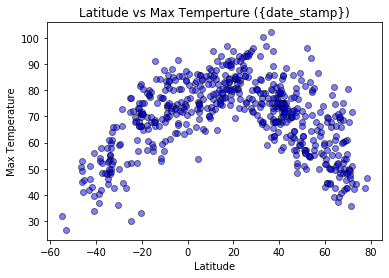

In [16]:

# time = time.gmtime(city_df["Date"][8])
# date_stamp = time.strftime("%x", time)

plt.scatter(city_df["Latitude"],city_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs Max Temperture ({date_stamp})")
plt.savefig("../output_data//fig1.png")
plt.show()

## Latitude vs. Humidity Plot

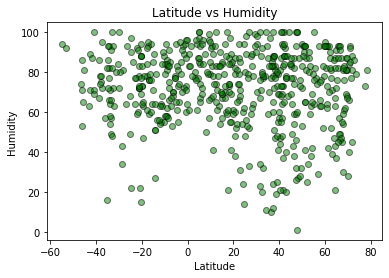

In [17]:
plt.scatter(city_df["Latitude"],city_df["Humidity"], marker="o", facecolors="green", edgecolors="black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.savefig("../output_data//fig2.png")
plt.show()


## Latitude vs. Cloudiness Plot

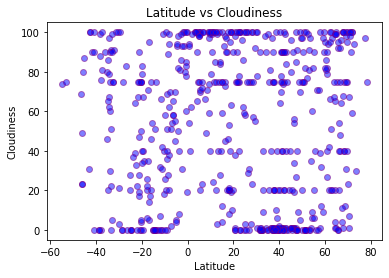

In [18]:
plt.scatter(city_df["Latitude"],city_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="purple",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.savefig("../output_data//fig3.png")
plt.show()


## Latitude vs. Wind Speed Plot

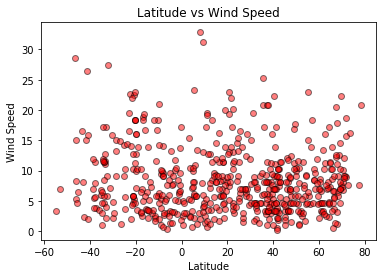

In [19]:
plt.scatter(city_df["Latitude"],city_df["Wind Speed"], marker="o", facecolors="red", edgecolors="black",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.savefig("../output_data//fig4.png")
plt.show()


## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots


In [21]:
# Create Northern and Southern Hemisphere DataFrames
city_weather_load = "../output_data/cities.csv"
city_weather_df = pd.read_csv(city_weather_load)
city_weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,66.99,96,78,7.56,EC,1594441742
1,Atambua,-9.11,124.89,82.00,62,36,3.76,ID,1594442440
2,Srīvardhan,18.03,73.02,84.61,73,53,8.50,IN,1594442440
3,Kapaa,22.08,-159.32,80.60,74,75,17.22,US,1594441978
4,New Norfolk,-42.78,147.06,46.00,89,100,2.35,AU,1594441954


In [22]:
north_hem = city_weather_df.loc[city_weather_df["Latitude"] >= 0]
north_hem.reset_index(inplace=True)

south_hem = city_weather_df.loc[city_weather_df["Latitude"] < 0]
south_hem.reset_index(inplace=True)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.43762657302610936


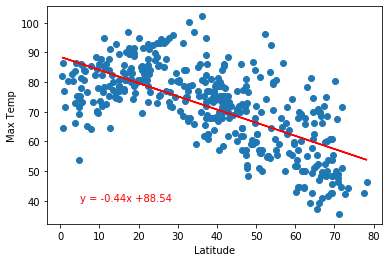

In [23]:
x_value = north_hem["Latitude"]
y_value = north_hem["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(5, 40),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../output_data//fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5708291863283965


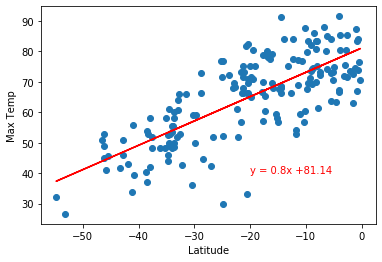

In [24]:
x_value = south_hem["Latitude"]
y_value = south_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(-20,40),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../output_data//fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010898423117687015


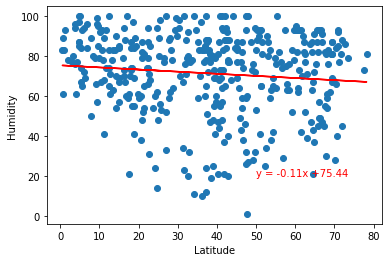

In [25]:
x_value = north_hem["Latitude"]
y_value = north_hem["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(50, 20),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data//fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 7.183103423790671e-06


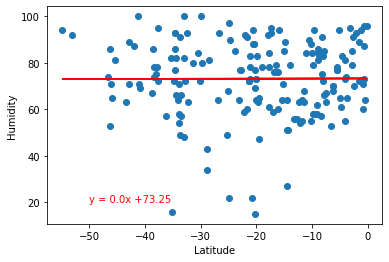

In [26]:
x_value = south_hem["Latitude"]
y_value = south_hem["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(-50, 20),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data//fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.016838976797837153


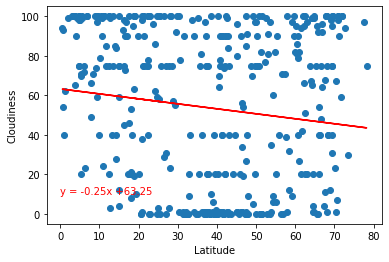

In [27]:
x_value = north_hem["Latitude"]
y_value = north_hem["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(0, 10),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data//fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003351018202693402


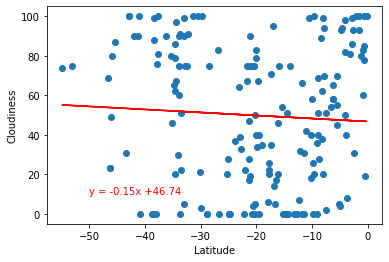

In [28]:
x_value = south_hem["Latitude"]
y_value = south_hem["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(-50, 10),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data//fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 3.972239834970756e-05


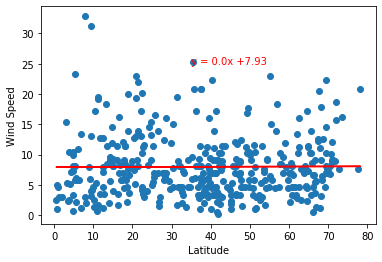

In [29]:
x_value = north_hem["Latitude"]
y_value = north_hem["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(35, 25),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data//fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.022074494539149704


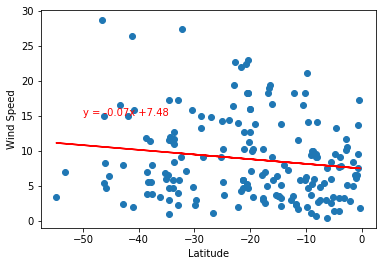

In [30]:
x_value = south_hem["Latitude"]
y_value = south_hem["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)

print(f"The r-squared is: {rvalue**2}")
r_line = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

regression_values = x_value * slope + intercept
plt.scatter(x_value,y_value)
plt.annotate(r_line,(-50, 15),color="red")
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data//fig12.png")
plt.show()